### Imports

In [1]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage.morphology import erosion, disk
from matplotlib.colors import ListedColormap

plt.rcParams['figure.dpi'] = 100

### Load and show the image slice

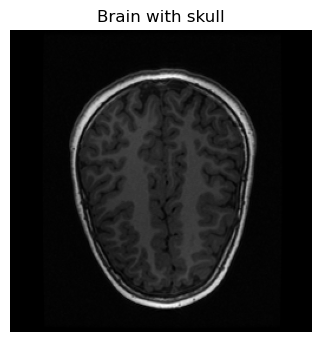

In [2]:
im_3d = imageio.imread('anat_defaced_blocked_blocked.nii')
im_2d = im_3d[105]

plt.title('Brain with skull')
plt.imshow(im_2d, cmap='gray')
plt.axis('off')
plt.show()

### Image analysis

In [3]:
dtype = im_2d.dtype
min_intensity = im_2d.min()
max_intensity = im_2d.max()

print(f'Dtype: {dtype}\nMin Intensity: {min_intensity}\nMax Intensity: {max_intensity}')

Dtype: int16
Min Intensity: 0
Max Intensity: 9055


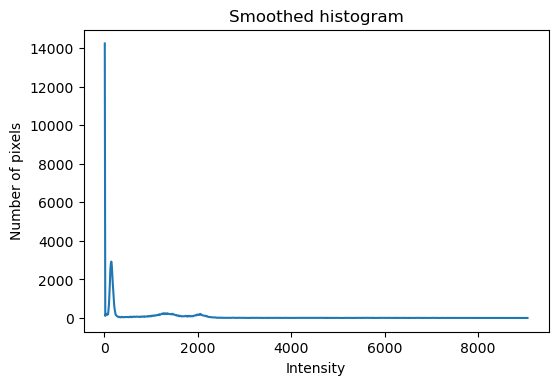

In [4]:
hist_smoothed = np.histogram(im_2d, bins=int((max_intensity-min_intensity +1)/10))

plt.plot(hist_smoothed[1][1:], hist_smoothed[0])

plt.title('Smoothed histogram')
plt.ylabel('Number of pixels')
plt.xlabel('Intensity')
plt.show()

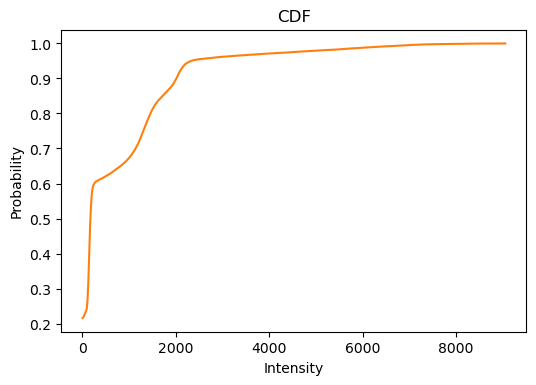

In [5]:
hist = np.histogram(im_2d, bins=max_intensity-min_intensity+1)
cdf = hist[0].cumsum()/hist[0].sum()

plt.plot(hist[1][1:], cdf, color='tab:orange')

plt.title('CDF')
plt.ylabel('Probability')
plt.xlabel('Intensity')
plt.show()

### Equalization

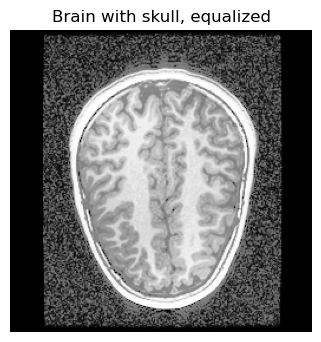

In [6]:
im_2d_equalized = cdf[im_2d] * max_intensity
plt.imshow(im_2d_equalized, cmap='gray')

plt.title('Brain with skull, equalized')
plt.axis('off')
plt.show()

### Masking

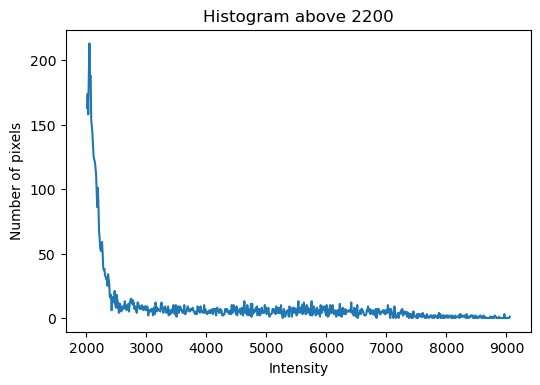

In [7]:
plt.plot(hist_smoothed[1][201:], hist_smoothed[0][200:])

plt.title('Histogram above 2200')
plt.ylabel('Number of pixels')
plt.xlabel('Intensity')
plt.show()

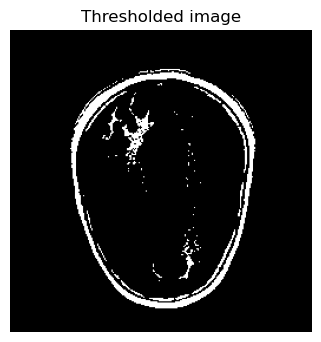

In [8]:
mask = im_2d > 2200
plt.imshow(mask, cmap='gray')

plt.title('Thresholded image')
plt.axis('off')
plt.show()

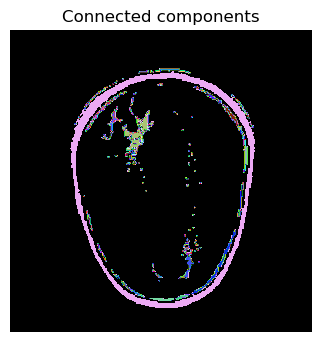

In [9]:
#se = disk(1)
#mask_eroded = erosion(mask, se)
#mask_eroded = dilation(mask, se)
mask_ud = mask[::-1]

labels_ud, _ = ndi.label(mask_ud)
labels = labels_ud[::-1]

cmap = ListedColormap(['black'] + [np.random.random(3) for _ in labels][1:])

plt.imshow(labels, cmap=cmap)

plt.title('Connected components')
plt.axis('off')
plt.show()

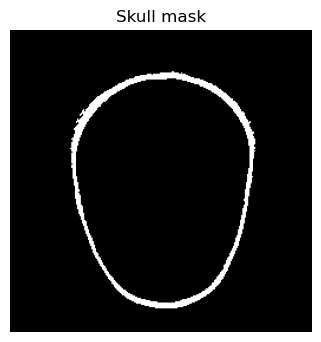

In [10]:
skull = labels == 1
plt.imshow(skull, cmap='gray')
plt.title('Skull mask')
plt.axis('off')
plt.show()

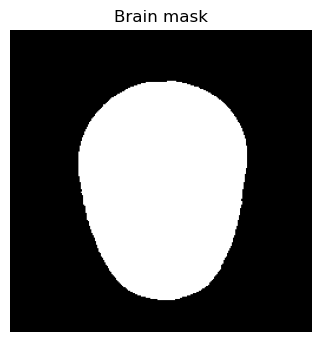

In [11]:
head = ndi.binary_fill_holes(skull)
brain = head * ~skull
brain = erosion(brain, disk(2))

plt.imshow(brain, cmap='gray')
plt.title('Brain mask')
plt.axis('off')
plt.show()

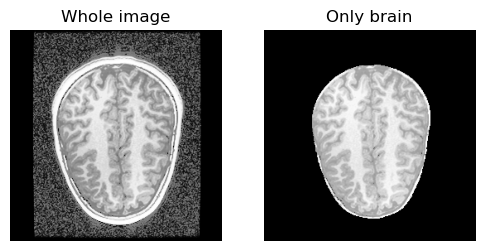

In [12]:
#cdf.shape
brain_only = im_2d_equalized.copy()
brain_only[~brain] = 0

plt.subplot(1,2,1)
plt.imshow(im_2d_equalized, cmap='gray')
plt.title('Whole image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(brain_only, cmap='gray')
plt.title('Only brain')
plt.axis('off')

plt.show()

### Filtering and edge detection

In [13]:
weights = [3*[1/9] for i in range(3)]
weights

[[0.1111111111111111, 0.1111111111111111, 0.1111111111111111],
 [0.1111111111111111, 0.1111111111111111, 0.1111111111111111],
 [0.1111111111111111, 0.1111111111111111, 0.1111111111111111]]

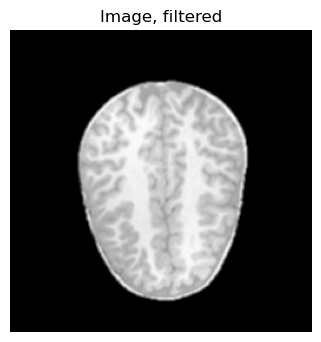

In [14]:
im_filtered = ndi.convolve(brain_only, weights)

plt.imshow(im_filtered, cmap='gray')
plt.title('Image, filtered')
plt.axis('off')
plt.show()

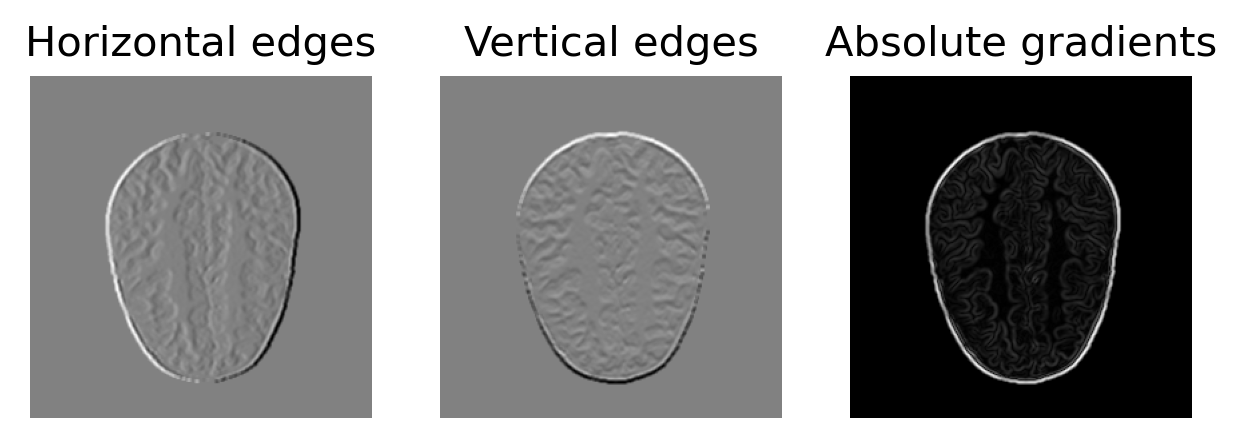

In [15]:
plt.rcParams['figure.dpi'] = 250

kernel_hor = np.array([[1, 0, -1]])
kernel_ver = kernel_hor.T

im_edged_hor = ndi.convolve(im_filtered, kernel_hor)
im_edged_ver = ndi.convolve(im_filtered, kernel_ver)


plt.subplot(1,3,1)
plt.imshow(im_edged_hor, cmap='gray')
plt.title('Horizontal edges')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(im_edged_ver, cmap='gray')
plt.title('Vertical edges')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.sqrt(im_edged_hor**2 + im_edged_ver**2), cmap='gray')
plt.title('Absolute gradients')
plt.axis('off')
plt.show()